# Juego: "Piedra, Papel o Tijera"
# Clasificación de Imágenes para Principiantes
# Red Neuronal Artificial (Perceptrón multicapa)
El perceptrón multicapa comúnmente se abrevia MLP por sus siglas en inglés (MultiLayer Perceptron)

### Librerías y versión de TensorFlow

In [1]:
import tensorflow as tf
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import random
import pathlib
import os
from tensorflow.keras.utils import image_dataset_from_directory
print(tf.__version__)


2.15.0


### Descargar Imágenes

Los imágenes que se encuentran en la carpeta del curso son una versión simplificada de las imágenes provistas por Julien de la Bruère-Terreault.

**Referencia**

Julien de la Bruère-Terreault, conjunto de datos "Rock-Paper-Scissors Images", disponible bajo la licencia CC BY-SA 4.0 (https://creativecommons.org/licenses/by-sa/4.0/) en https://www.kaggle.com/datasets/drgfreeman/rockpaperscissors

In [ ]:
# Directorio de trabajo en Colab
print("CWD:", os.getcwd())
!unzip -q piedra_papel_tijera.zip -d piedra_papel_tijera

CWD: /content
replace piedra_papel_tijera/piedra_papel_tijera/papel/0.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace piedra_papel_tijera/piedra_papel_tijera/papel/1.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace piedra_papel_tijera/piedra_papel_tijera/papel/10.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace piedra_papel_tijera/piedra_papel_tijera/papel/100.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace piedra_papel_tijera/piedra_papel_tijera/papel/101.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: [n]
error:  invalid response [[n]]
replace piedra_papel_tijera/piedra_papel_tijera/papel/101.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
print(os.listdir('/content/piedra_papel_tijera/piedra_papel_tijera'))

['piedra', 'tijera', 'papel']


In [ ]:
# Corrected directory path
data_dir = "/content/piedra_papel_tijera/piedra_papel_tijera"
dataset = image_dataset_from_directory(
    directory=data_dir,
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(150, 150),
    shuffle=True
)

# Prueba rápida:
for imgs, labs in dataset.take(1):
    print("Batch imágenes:", imgs.shape)
    print("Batch etiquetas:", labs.numpy()[:10])

Found 2100 files belonging to 3 classes.
Batch imágenes: (32, 150, 150, 3)
Batch etiquetas: [2 2 0 1 1 1 0 1 1 1]


### Cargar Imágenes de *Piedras*, *Papeles*, y *Tijeras*
Se asume que las imágenes están agrupadas por clase y que se encuentran en carpetas diferentes: *piedra*, *papel*,  *tijera*. Además, cada carpeta tiene imágenes cuyo nombre va de 0.png a 699.png indicando el número de imagen.

In [ ]:
# 1) Descripción de clases e identificador
descripcion = ("papel", "piedra", "tijera")
clases = {nombre: idx for idx, nombre in enumerate(descripcion)}

# 2) Directorio raíz donde están las subcarpetas 'paper','rock','scissors'
ruta = "/content/piedra_papel_tijera/piedra_papel_tijera"

# 3) Use image_dataset_from_directory to load data
dataset = image_dataset_from_directory(
    directory=ruta,
    labels="inferred",
    label_mode="int",
    batch_size=32,  # Adjust batch size as needed
    image_size=(20, 30),  # Resize images to desired dimensions
    shuffle=True
)

# 4) Split the dataset into training and testing sets
# Assuming a 70/30 split
num_total = len(dataset)  # Total number of batches
num_train = int(0.7 * num_total)
num_test = num_total - num_train

train_dataset = dataset.take(num_train)
test_dataset = dataset.skip(num_train).take(num_test)

# 5) Convert datasets to NumPy arrays for model training
# Pre-allocate arrays for efficiency
# You will get the actual number of images from the dataset
num_train_images = sum(imgs.shape[0] for imgs, _ in train_dataset)
num_test_images = sum(imgs.shape[0] for imgs, _ in test_dataset)

# Updated: Include color channel in the shape
imagenes_entrena = np.zeros((num_train_images, 20, 30, 3), dtype=np.uint8)
clases_entrena = np.zeros(num_train_images, dtype=np.uint8)

# Updated: Include color channel in the shape
imagenes_prueba = np.zeros((num_test_images, 20, 30, 3), dtype=np.uint8)
clases_prueba = np.zeros(num_test_images, dtype=np.uint8)

# Populate arrays with data from train dataset
train_idx = 0
for imgs, labs in train_dataset:
    batch_size = imgs.shape[0]
    imagenes_entrena[train_idx : train_idx + batch_size] = imgs.numpy().astype(np.uint8)
    clases_entrena[train_idx : train_idx + batch_size] = labs.numpy()
    train_idx += batch_size

# Populate arrays with data from test dataset
test_idx = 0
for imgs, labs in test_dataset:
    batch_size = imgs.shape[0]
    imagenes_prueba[test_idx : test_idx + batch_size] = imgs.numpy().astype(np.uint8)
    clases_prueba[test_idx : test_idx + batch_size] = labs.numpy()
    test_idx += batch_size


# 6) Verificación de shapes
print("Entrena X:", imagenes_entrena.shape, "y:", clases_entrena.shape)
print("Prueba  X:", imagenes_prueba.shape,  "y:", clases_prueba.shape)

Found 2100 files belonging to 3 classes.
Entrena X: (1472, 20, 30, 3) y: (1472,)
Prueba  X: (628, 20, 30, 3) y: (628,)


Otra opción para cargar las imágenes es tf.keras.utils.*image_dataset_from_directory(ruta,  image_size=(20, 30))* aunque requiere estar familiarizado con la clase PrefetchDataset de TensorFlow

# Visualización de algunas imágenes

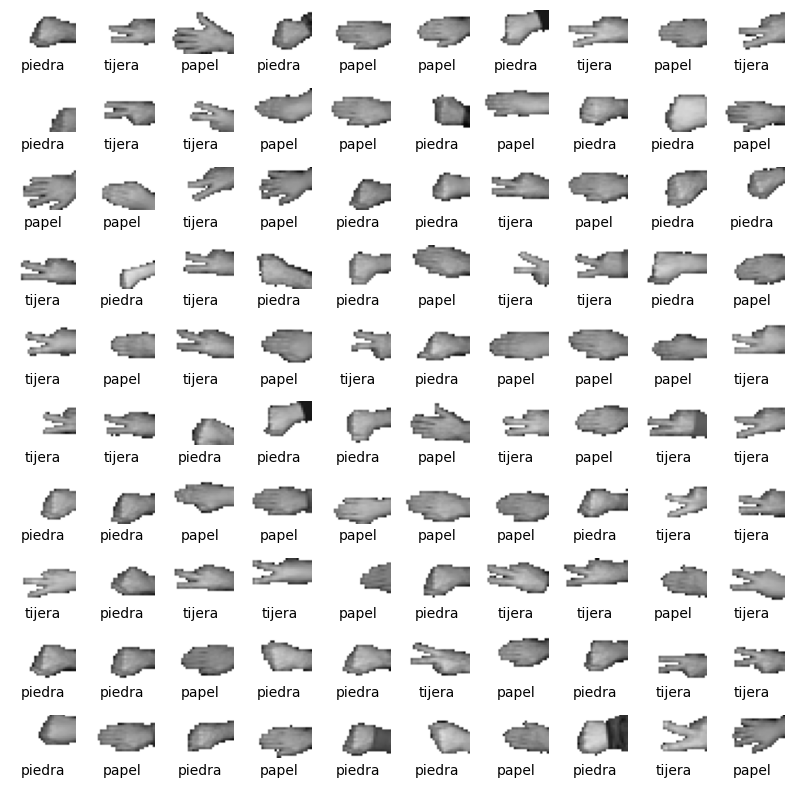

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(100):
    plt.subplot(10, 10, i + 1)
    # Selección aleatoria de una imagen
    # Use num_train_images instead of num_entrena
    indice = random.randint(0, num_train_images - 1)
    plt.imshow(imagenes_entrena[indice], cmap="gray")
    plt.xlabel(descripcion[clases_entrena[indice]])
    plt.grid(False)
    plt.box(False)
    plt.xticks([])
    plt.yticks([])
plt.show()

## Visualización de una imagen arbitraria en tamaño grande

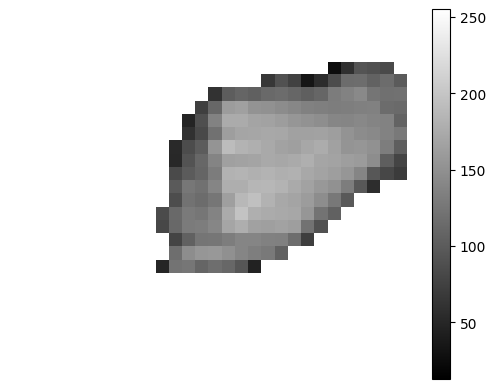

In [ ]:
plt.figure()
plt.imshow(imagenes_prueba[102], cmap="gray")
plt.colorbar()
plt.grid(False)
plt.box(False)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.show()

### Escalar los píxeles de las imágenes del rango [0, 255] al rango [0, 1]

In [ ]:
imagenes_entrena = imagenes_entrena / 255
imagenes_prueba = imagenes_prueba / 255

# Creación del modelo de la Red Neuronal Artificial (MLP)

In [ ]:
modelo = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(20, 30)),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(3),
    tf.keras.layers.Softmax()
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# Cofigurar el Modelo para Entrenamiento

In [ ]:
modelo = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(20, 30, 3)),  # Adjust input shape to include color channels
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(3),
    tf.keras.layers.Softmax()
])

# Compile the model
modelo.compile(optimizer='adam',  # You can choose other optimizers like 'sgd', 'rmsprop', etc.
              loss='sparse_categorical_crossentropy',  # Use this for integer labels
              metrics=['accuracy'])  # You can add other metrics like 'precision', 'recall', etc.

modelo.fit(imagenes_entrena, clases_entrena, epochs=50)

Epoch 1/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3500 - loss: 1.4106
Epoch 2/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6066 - loss: 0.9058
Epoch 3/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6878 - loss: 0.7967
Epoch 4/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7335 - loss: 0.7190
Epoch 5/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7615 - loss: 0.6380
Epoch 6/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7813 - loss: 0.6030
Epoch 7/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7893 - loss: 0.5690
Epoch 8/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7597 - loss: 0.5998
Epoch 9/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8146 - loss: 0.5280
Epoch 10/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8170 - loss: 0.5159
Epoch 11/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8279 - loss: 0.5132
Epoch 12/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8205 - 

# Entrena el Modelo (es decir, la Red Neuronal Artificial)

# Evalúa el modelo (porcentaje de aciertos con datos de prueba)

In [ ]:
perdida, exactitud = modelo.evaluate(imagenes_prueba, clases_prueba)
print("Exactitud (Accuracy) = aciertos_prueba / imagenes_de_prueba):", exactitud)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8195 - loss: 0.5232  
Exactitud (Accuracy) = aciertos_prueba / imagenes_de_prueba): 0.8136942386627197


# Clasifica las Imágenes de Prueba con la Red Neuronal

In [ ]:
predicciones = modelo.predict(imagenes_prueba)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


# Salida de la Red Neuronal para cada Imagen de Prueba

In [ ]:
# Creación de arreglo para almacenar predicciones
# Fix: Replace num_prueba with len(clases_prueba)
clase_predicha = np.empty(len(clases_prueba) * len(clases), dtype = "uint8")

# The loop should iterate over the actual number of predictions
for instancia in range(len(predicciones)):
  # almacena clase predicha para una imagen dada
  clase_predicha[instancia] = np.argmax(predicciones[instancia])

  # Check if the instance index is within the bounds of clases_prueba
  if instancia < len(clases_prueba):
    if clase_predicha[instancia] == clases_prueba[instancia]:
      print("Probabilidades:", predicciones[instancia],
            "Clase predicha:", clase_predicha[instancia],
            "Clase correcta:", clases_prueba[instancia],
            "La Red Neuronal ACERTÓ")
    else:
      print("Probabilidades:", predicciones[instancia],
            "Clase predicha:", clase_predicha[instancia],
            "Clase correcta:", clases_prueba[instancia],
            "La Red Neuronal ERRÓ")
  else:
    print(f"Warning: Instance index {instancia} is out of bounds for clases_prueba")

Probabilidades: [0.02519537 0.86321366 0.11159097] Clase predicha: 1 Clase correcta: 1 La Red Neuronal ACERTÓ
Probabilidades: [0.958665  0.0376333 0.0037017] Clase predicha: 0 Clase correcta: 0 La Red Neuronal ACERTÓ
Probabilidades: [0.0602084  0.9375253  0.00226643] Clase predicha: 1 Clase correcta: 1 La Red Neuronal ACERTÓ
Probabilidades: [0.00183355 0.9795108  0.0186556 ] Clase predicha: 1 Clase correcta: 1 La Red Neuronal ACERTÓ
Probabilidades: [9.9594599e-01 3.9184428e-04 3.6620463e-03] Clase predicha: 0 Clase correcta: 0 La Red Neuronal ACERTÓ
Probabilidades: [0.09077394 0.01520326 0.89402276] Clase predicha: 2 Clase correcta: 0 La Red Neuronal ERRÓ
Probabilidades: [0.9119675  0.06658561 0.0214469 ] Clase predicha: 0 Clase correcta: 0 La Red Neuronal ACERTÓ
Probabilidades: [0.33669388 0.46863392 0.1946722 ] Clase predicha: 1 Clase correcta: 1 La Red Neuronal ACERTÓ
Probabilidades: [0.00943237 0.00192451 0.9886431 ] Clase predicha: 2 Clase correcta: 2 La Red Neuronal ACERTÓ
Probab

# Matriz de Confusión: Resultado de Evaluación a Detalle

In [ ]:
# papel : 0     piedra : 1     tijera : 2
matriz = tf.math.confusion_matrix(clases_prueba, clase_predicha[:len(clases_prueba)])  # Ensure both arrays have the same size
print("Matriz de Confusión:\n", matriz.numpy())

Matriz de Confusión:
 [[136  14  54]
 [  2 192  34]
 [  5   8 183]]


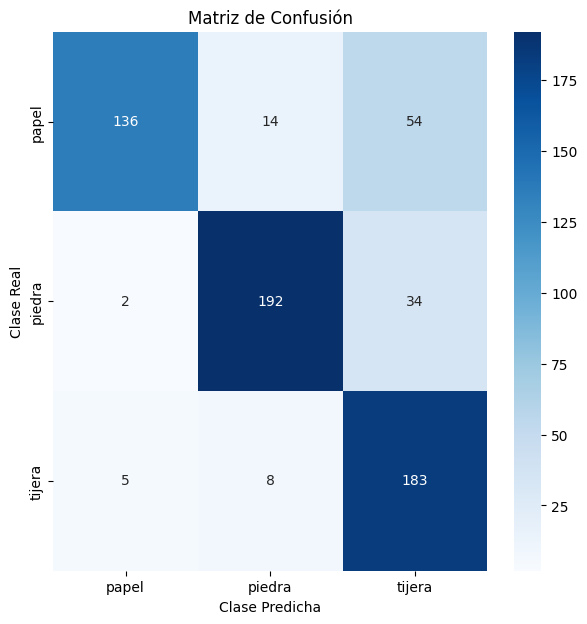

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 7))
sns.heatmap(matriz, annot=True, fmt="d", cmap="Blues",
            xticklabels=descripcion, yticklabels=descripcion)
plt.xlabel("Clase Predicha")
plt.ylabel("Clase Real")
plt.title("Matriz de Confusión")
plt.show()


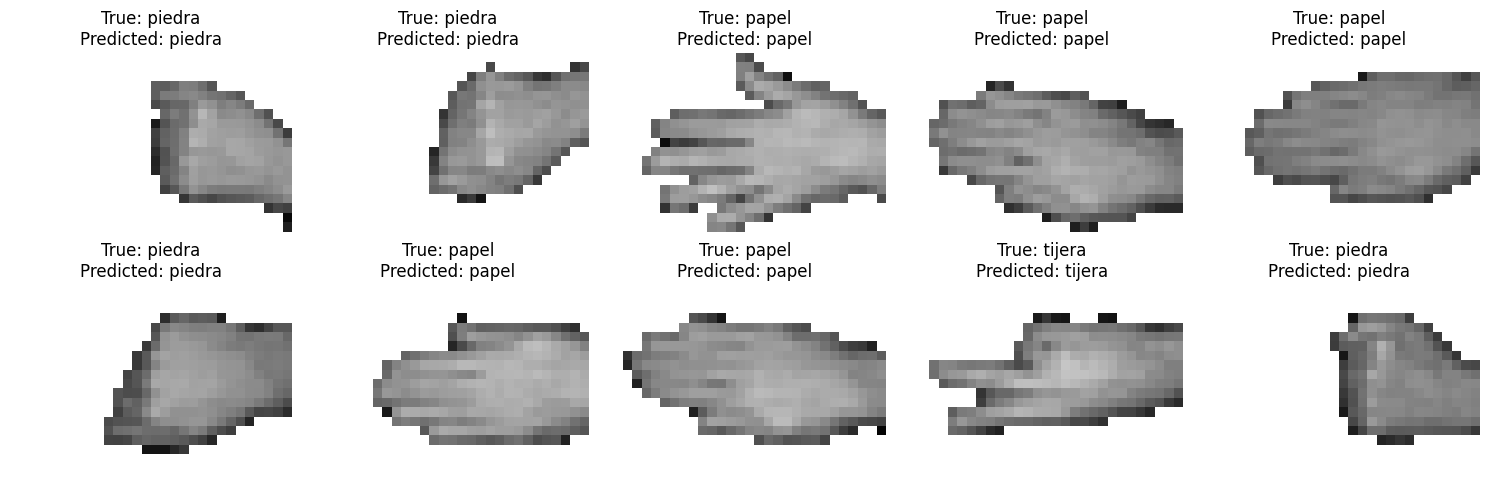

In [ ]:
# prompt: Genera la gráfica de algunas imagenes junto a sus predicciones

import matplotlib.pyplot as plt
import random


# Assuming 'imagenes_prueba', 'clases_prueba', 'clase_predicha', and 'descripcion' are defined

num_images_to_show = 10  # Number of images to display

plt.figure(figsize=(15, 5))

for i in range(num_images_to_show):
    random_index = random.randint(0, len(imagenes_prueba) - 1)
    image = imagenes_prueba[random_index]
    true_label = clases_prueba[random_index]
    predicted_label = clase_predicha[random_index]

    plt.subplot(2, 5, i + 1)
    plt.imshow(image)
    plt.title(f"True: {descripcion[true_label]}\nPredicted: {descripcion[predicted_label]}")
    plt.axis('off')

plt.tight_layout()
plt.show()
